In [ ]:
import pandas as pd
import numpy as np
import statistics

data={'Name':['Sanket','Ani','Sheena','Raj','Reeta','Alekh'],
      'Age':[18,15,21,19,27,29],
      'Gender':['M','M','F','M','F','M'],
      'Marks':[75,68,87,77,97,68],
      'PhD':['Y','N','Y','Y','N','Y']
      }
df=pd.DataFrame(data)
df

,Name,Age,Gender,Marks,PhD
0,Sanket,18,M,75,Y
1,Ani,15,M,68,N
2,Sheena,21,F,87,Y
3,Raj,19,M,77,Y
4,Reeta,27,F,97,N
5,Alekh,29,M,68,Y


In [ ]:

data2={'Name':['Sanket','Ani','Sheena','Raj','Reeta','Alekh'],
      'Age':[18,15,21,19,np.NaN,29],
      'Gender':['M','M','N/a','M','F','na'],
      'Marks':[75,68,87,np.nan,97,68],
      'PhD':['Y','Y','N',17,'N',np.nan]
}
df2=pd.DataFrame(data2)
df2

,Name,Age,Gender,Marks,PhD
0,Sanket,18.0,M,75.0,Y
1,Ani,15.0,M,68.0,Y
2,Sheena,21.0,N/a,87.0,N
3,Raj,19.0,M,NaN,17
4,Reeta,NaN,F,97.0,N
5,Alekh,29.0,na,68.0,NaN


In [ ]:
print (df2['Age'])
print(df2['Age'].isnull())

0    18.0
1    15.0
2    21.0
3    19.0
4     NaN
5    29.0
Name: Age, dtype: float64
0    False
1    False
2    False
3    False
4     True
5    False
Name: Age, dtype: bool


In [ ]:
print(df2['Gender'])
print(df2['Gender'].isnull())

0      M
1      M
2    N/a
3      M
4      F
5     na
Name: Gender, dtype: object
0    False
1    False
2    False
3    False
4    False
5    False
Name: Gender, dtype: bool


In [ ]:
#making list of missing values
#missing_values=['N/a','na']
#df2=pd.read_csv(df2,na_values=missing_values)
#print(df2['Gender'])
#print(df2['Gender'].isnull())


In [ ]:
print(df2['PhD'])
print(df2['PhD'].isnull())

0      Y
1      Y
2      N
3     17
4      N
5    NaN
Name: PhD, dtype: object
0    False
1    False
2    False
3    False
4    False
5     True
Name: PhD, dtype: bool


In [ ]:
#Detecting numbers
cnt=0
for row in df2['PhD']:
  try:
    int(row)
    df2.loc[cnt,'PhD']=np.nan
  except ValueError:
    pass
  cnt+=1
print(df2['PhD'])
print(df2['PhD'].isnull())

0      Y
1      Y
2      N
3    NaN
4      N
5    NaN
Name: PhD, dtype: object
0    False
1    False
2    False
3     True
4    False
5     True
Name: PhD, dtype: bool


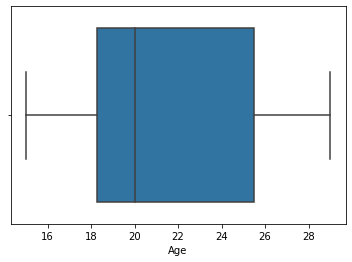

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Age'])

In [ ]:
#position of outlinear
print(np.where(df['Age']>20))

(array([2, 4, 5]),)


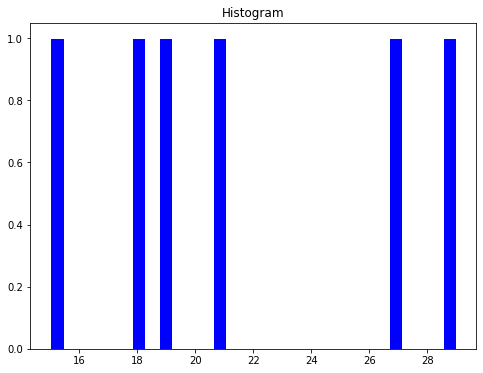

In [ ]:
fig,x=plt.subplots(figsize=(8,6))
ax=plt.hist(df['Age'],bins=30,color='b',edgecolor='w')
plt.title('Histogram')
plt.show()

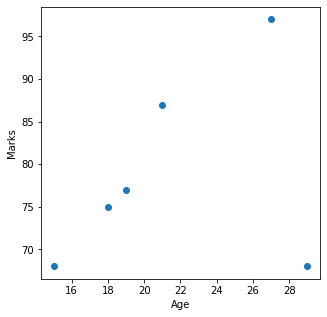

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df['Age'],df['Marks'])

#x-axis label
ax.set_xlabel('Age')

#y- axis label
ax.set_ylabel('Marks')
plt.show()

In [ ]:
df['Log_Age']=np.log(df['Age'])
df

,Name,Age,Gender,Marks,PhD,Log_Age
0,Sanket,18,M,75,Y,2.890372
1,Ani,15,M,68,N,2.708050
2,Sheena,21,F,87,Y,3.044522
3,Raj,19,M,77,Y,2.944439
4,Reeta,27,F,97,N,3.295837
5,Alekh,29,M,68,Y,3.367296


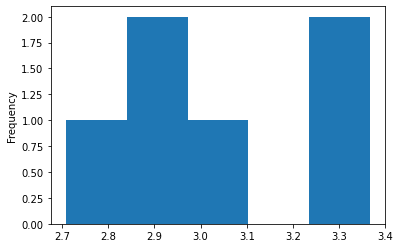

In [ ]:
df['Log_Age'].plot.hist(bins=5)

In [ ]:
df_scaled=df.copy()
col=['Age','Marks']
features=df_scaled[col]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled[col]=scaler.fit_transform(features.values)
df_scaled

,Name,Age,Gender,Marks,PhD,Log_Age
0,Sanket,0.214286,M,0.241379,Y,2.890372
1,Ani,0.000000,M,0.000000,N,2.708050
2,Sheena,0.428571,F,0.655172,Y,3.044522
3,Raj,0.285714,M,0.310345,Y,2.944439
4,Reeta,0.857143,F,1.000000,N,3.295837
5,Alekh,1.000000,M,0.000000,Y,3.367296
